In [50]:
import pandas as pd
import numpy as np
import plotly.express as px # interface haut-niveau pour créer des graphiques rapidement et facilement.
import plotly.graph_objects as go # interface bas-niveau qui offre un contrôle plus fin sur les éléments du graphique
import io
import plotly.io as pio    # pour exporter en image
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
df.shape

(244, 7)

In [8]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [13]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [40]:
fig1 = px.scatter(df, x="total_bill",y="tip", size="size", color= "day", trendline="ols")
fig1.show()

In [36]:
fig1.write_image("fig1.png")

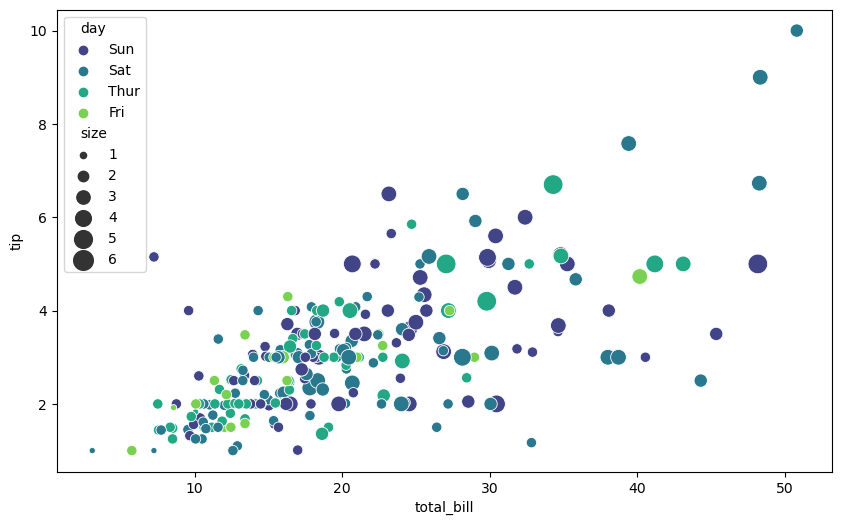

In [32]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x="total_bill", y="tip", size="size", hue="day", palette="viridis", sizes=(20, 200))

In [20]:
fig2 = px.scatter(df, x="total_bill",y="tip", size="size", color= "sex")
fig2.show()

In [35]:
fig2.write_image("fig2.png")

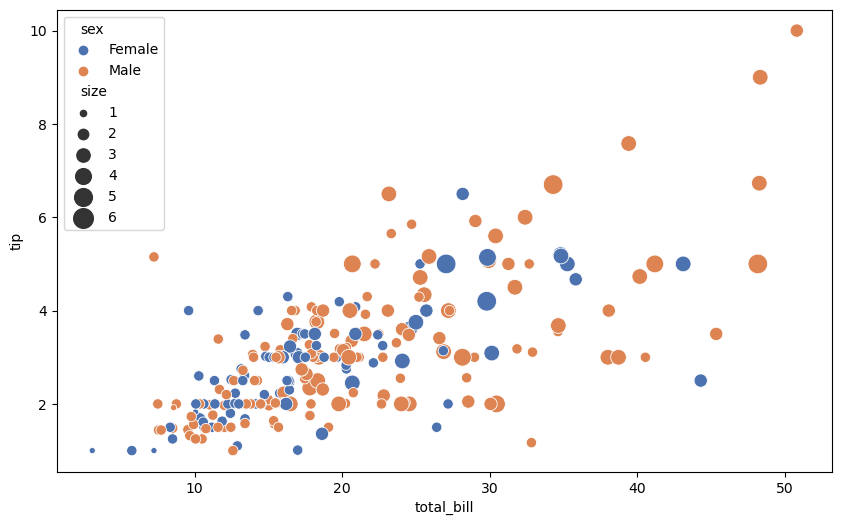

In [33]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x="total_bill", y="tip", size="size", hue="sex", palette="deep", sizes=(20, 200))

In [21]:
fig3 = px.scatter(df, x="total_bill",y="tip", size="size", color= "time", trendline="ols")
fig3.show()

In [38]:
fig3.write_image("fig3.png")

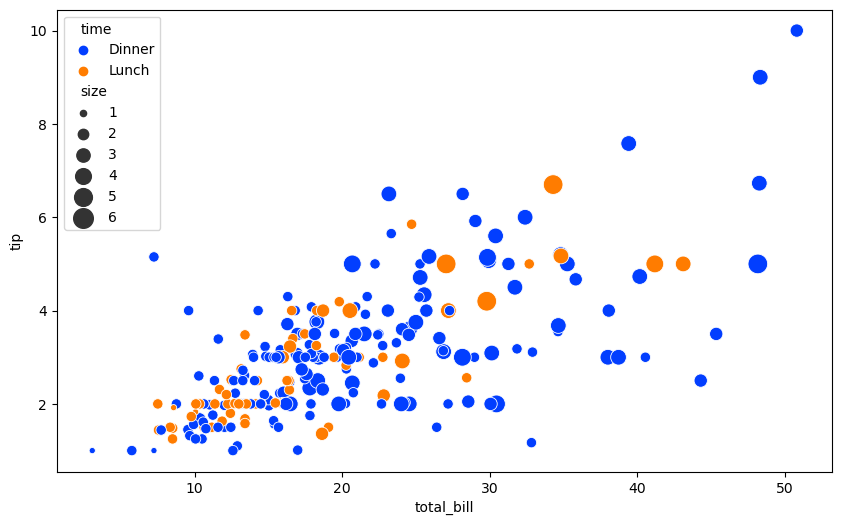

In [37]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x="total_bill", y="tip", size="size", hue="time", palette="bright", sizes=(20, 200))

In [45]:
pie1 = px.pie(df,values='tip', names='day',hole = 0.5)
pie1.show()

In [42]:
pie1.write_image("pie1.png")

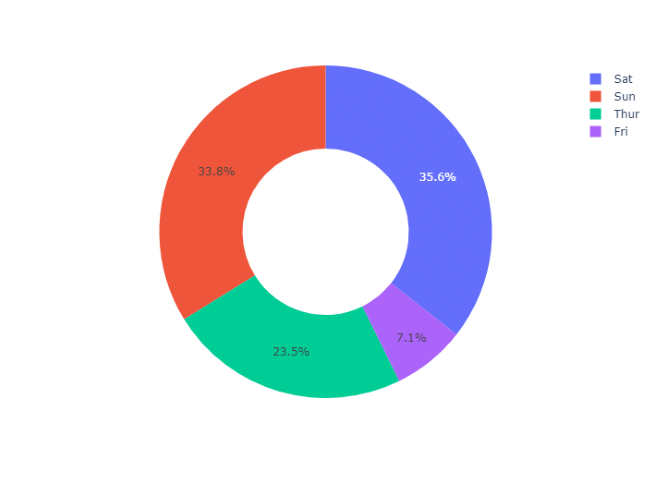

In [56]:
pie1_plt = pio.to_image(pie1, format='png')
img = plt.imread(io.BytesIO(pie1_plt))
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [53]:
pie2 = px.pie(df,values='tip', names='sex',hole = 0.5)
pie2.show()

In [47]:
pie2.write_image("pie2.png")

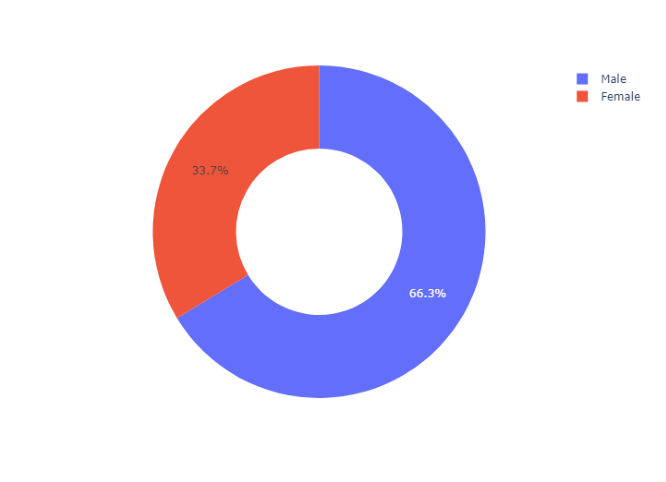

In [58]:
pie2_plt = pio.to_image(pie2, format='png')
img = plt.imread(io.BytesIO(pie2_plt))
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [60]:
pie3 = px.pie(df,values='tip', names='time',hole = 0.5)
pie3.show()

In [61]:
pie3.write_image("pie3.png")

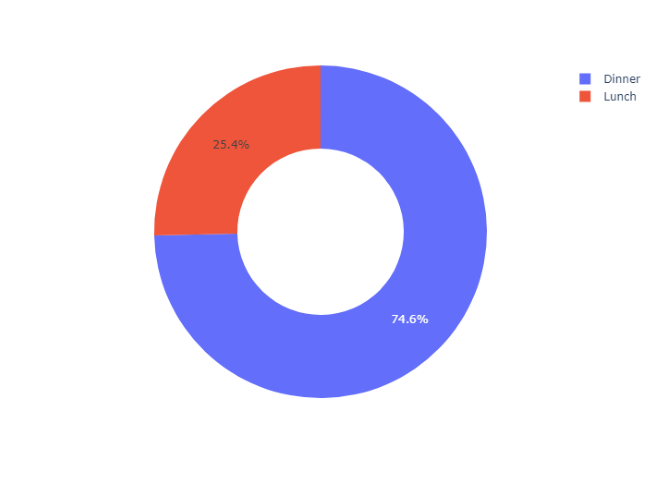

In [62]:
pie3_plt = pio.to_image(pie3, format='png')
img = plt.imread(io.BytesIO(pie3_plt))
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

encode categorical variables as numerical variables.

In [63]:
df["sex"] = df["sex"].map({"Female": 0, "Male": 1})
df["smoker"] = df["smoker"].map({"No": 0, "Yes": 1})
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [67]:
X=df.drop("tip", axis=1)
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,3,1,2
1,10.34,1,0,3,1,3
2,21.01,1,0,3,1,3
3,23.68,1,0,3,1,2
4,24.59,0,0,3,1,4


In [70]:
y=df["tip"]
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64